In [1]:
#
# hw9pr2a.ipynb ~ cs35/cs181 spring 2021
#

In [2]:
#
# libraries we have...
#
import numpy as np
from matplotlib import pyplot as plt
import cv2
import seaborn as sns

image with name avengers.jpg read with dimensions: (1200, 985, 3)
resizing to rows, cols = 600, 492


<IPython.core.display.Javascript object>


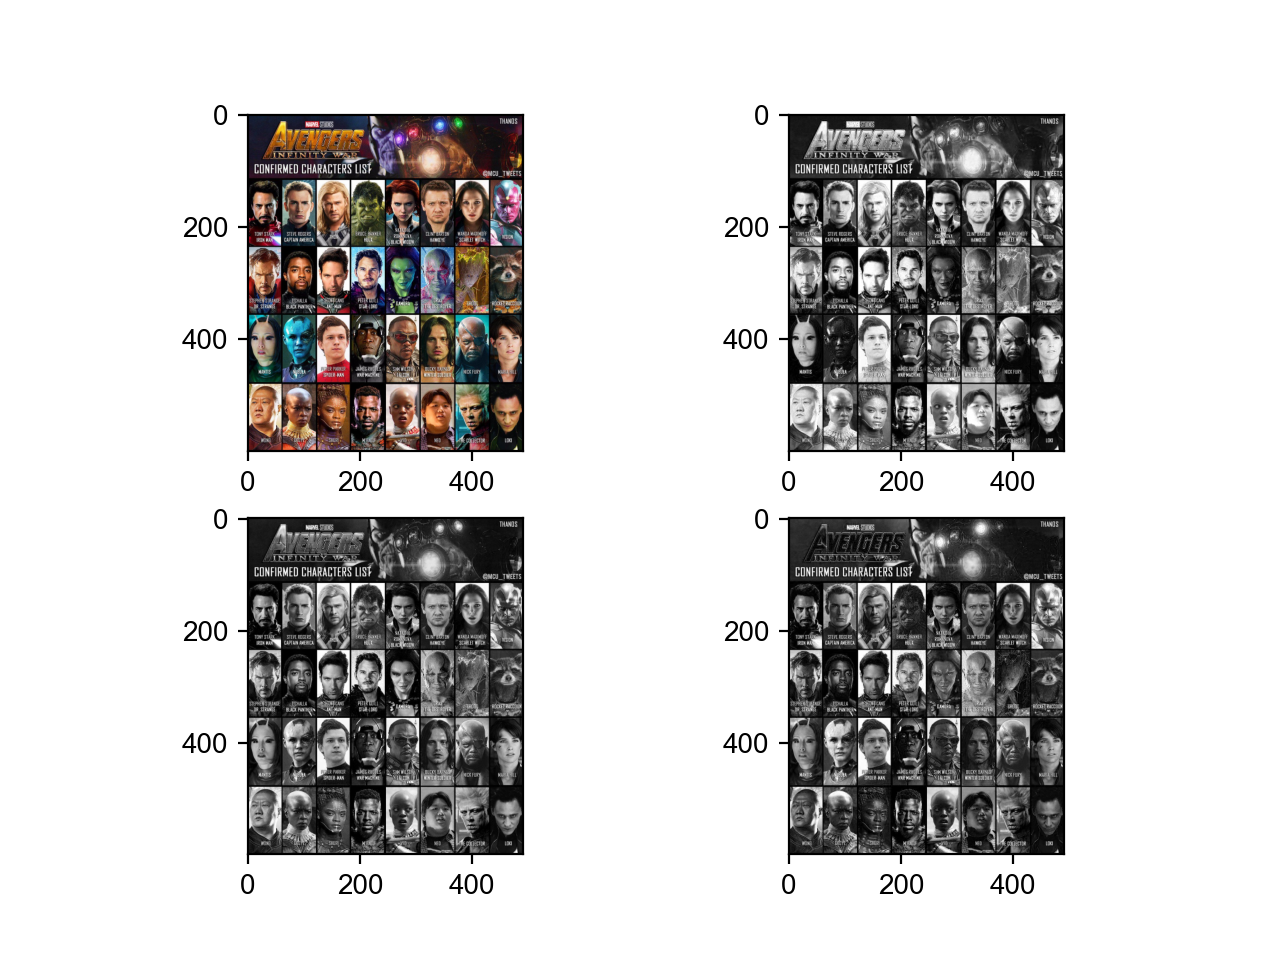

In [3]:
%matplotlib notebook 

#
# let's capture this open-and-convert-to-rgb into a function
#
def opencv_open_into_rgb( image_file_name ):
    """ open image_file_name and convert to rgb """
    image_raw = cv2.imread(image_file_name, cv2.IMREAD_COLOR)  # reads into BGR
    orig_num_rows, orig_num_cols, _ = image_raw.shape          # cool underscore variable!
    num_rows, num_cols, _ = image_raw.shape
    print(f"image with name {image_file_name} read with dimensions: {image_raw.shape}")
    #
    # let's resize as long as any dimension is > 840...
    #
    maxdim = max(num_rows,num_cols)
    while maxdim > 840:
        num_rows = num_rows//2  # halve!
        num_cols = num_cols//2  # halve!
        maxdim = max(num_rows,num_cols) # try again...
        
    if orig_num_rows != num_rows: # did we resize?
        print(f"resizing to rows, cols = {num_rows}, {num_cols}")
        image_raw = cv2.resize(image_raw, dsize=(num_cols,num_rows), interpolation=cv2.INTER_LINEAR)  # resizing
        
    # now, convert to rgb
    image_rgb = cv2.cvtColor(image_raw, cv2.COLOR_BGR2RGB)     # convert from BGR to RGB
    return image_rgb

image_rgb = opencv_open_into_rgb("avengers.jpg")  # "coffee.jpg"  "flag.png"  "avengers.jpg"

#
# let's show off how to create multiple images in one figure, too
#
fig, ax = plt.subplots(2,2)  # this means ax will be a 2x2 numpy array of axes!
ax[0,0].imshow(image_rgb)
ax[0,1].imshow(image_rgb[:,:,0],cmap="gray")  # red-channel image
ax[1,0].imshow(image_rgb[:,:,1],cmap="gray")  # green-channel image
ax[1,1].imshow(image_rgb[:,:,2],cmap="gray")  # blue-channel image

In [4]:
#
# nice to be able to save to a file...    and not worry about its BGR-ness
#

def save_rgb_image( image_rgb, new_file_name ):
    """ saves the image  image_rgb  to the (string) name, new_file_name
        add the extension you'd like, png, jpg, ... it knows many (not all)
    """
    image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)     # convert from BGR to RGB
    result = cv2.imwrite(new_file_name,image_bgr)
    if result == True:
        print(f"image_rgb was saved to {new_file_name}")
    else:
        print(f"there was a problem saving image_rgb to {new_file_name}")
    
#
# try it!
#
save_rgb_image( image_rgb, "new_image.png" )  # it needs the extension

image_rgb was saved to new_image.png


In [5]:
ls

__pycache__/
avengers.jpg
batman.png
coffee.jpg
disney.jpg
face_finding_webcam_opencv.py
flag.png
fox.jpg
haarcascade_frontalface_alt.xml
haarcascade_frontalface_alt2.xml
haarcascade_frontalface_default.xml
haarcascade_frontalface_default_2005.xml
haarcascade_profileface_newer.xml
hmc.png
hulkface.png
hw9pr2a.ipynb
hw9pr2b.ipynb
jp.png
messi5.jpg*
monalisa.jpg*
new_image.png
spam.png*
thematrix.png
utils.py


In [6]:
#
# these are "cascades," the pre-trained, "transferred" models...
#

# https://github.com/opencv/opencv/tree/master/data/haarcascades
# https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades_cuda/haarcascade_profileface.xml

#cascPath = "./haarcascade_frontalface_alt_tree.xml"
#cascPath = "./haarcascade_frontalface_alt.xml"
cascPath = "./haarcascade_frontalface_default.xml"
#cascPath = "./haarcascade_profileface_newer.xml"
faceCascade = cv2.CascadeClassifier(cascPath)

image with name avengers.jpg read with dimensions: (1200, 985, 3)
resizing to rows, cols = 600, 492


<IPython.core.display.Javascript object>


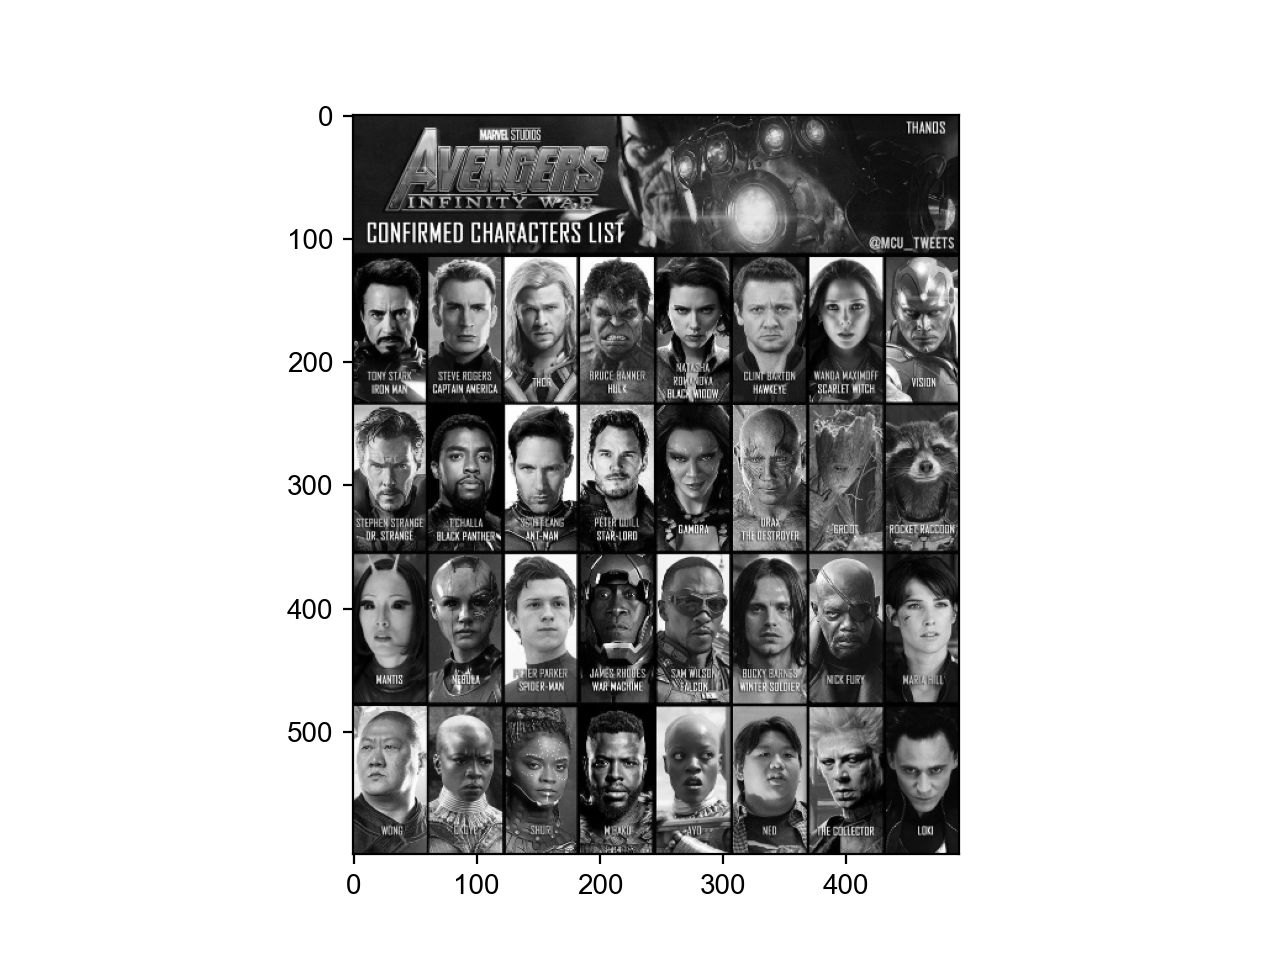

In [7]:
# Read the image
image_faces_rgb = opencv_open_into_rgb("avengers.jpg")
#image_faces_rgb = opencv_open_into_rgb("disney.jpg")
#image_faces_rgb = opencv_open_into_rgb("vanellope.jpg")
image_faces_gray = cv2.cvtColor(image_faces_rgb, cv2.COLOR_RGB2GRAY)

#
# let's show off how to create multiple images in one figure, too
#
fig, ax = plt.subplots(1,1)  # this means ax will be a 2x2 numpy array of axes!
ax.imshow(image_faces_gray,cmap="gray")

In [8]:
# Detect faces in the image
faces = faceCascade.detectMultiScale(
    image_faces_gray,
    scaleFactor=1.05,
    minNeighbors=1,
    minSize=(10,10),
    flags = cv2.CASCADE_SCALE_IMAGE,
)
print(f"Found {len(faces)} faces!")

Found 36 faces!


In [9]:
for i, face in enumerate(faces):
    x,y,w,h = face
    print(f"face {i}: {face}")

face 0: [129 140  47  47]
face 1: [250 139  53  53]
face 2: [ 64 136  56  56]
face 3: [352  56  54  54]
face 4: [  3 141  55  55]
face 5: [189 143  47  47]
face 6: [371 137  56  56]
face 7: [307 135  61  61]
face 8: [166   0 319 319]
face 9: [305 255  64  64]
face 10: [188 255  53  53]
face 11: [ 68 255  57  57]
face 12: [246 256  60  60]
face 13: [124 266  55  55]
face 14: [  3 267  53  53]
face 15: [309 379  57  57]
face 16: [128 375  58  58]
face 17: [440 380  52  52]
face 18: [  1 381  55  55]
face 19: [372 384  55  55]
face 20: [ 59 372  63  63]
face 21: [419 378  52  52]
face 22: [249 372  68  68]
face 23: [ 10 438  39  39]
face 24: [345 447  30  30]
face 25: [  5 519  26  26]
face 26: [ 20 380  51  51]
face 27: [188 505  51  51]
face 28: [366 502  58  58]
face 29: [ 85 526  32  32]
face 30: [248 497  56  56]
face 31: [317 498  54  54]
face 32: [ 80 511  40  40]
face 33: [129 505  58  58]
face 34: [434 512  54  54]
face 35: [  1 512  58  58]


Drawn!!


<IPython.core.display.Javascript object>


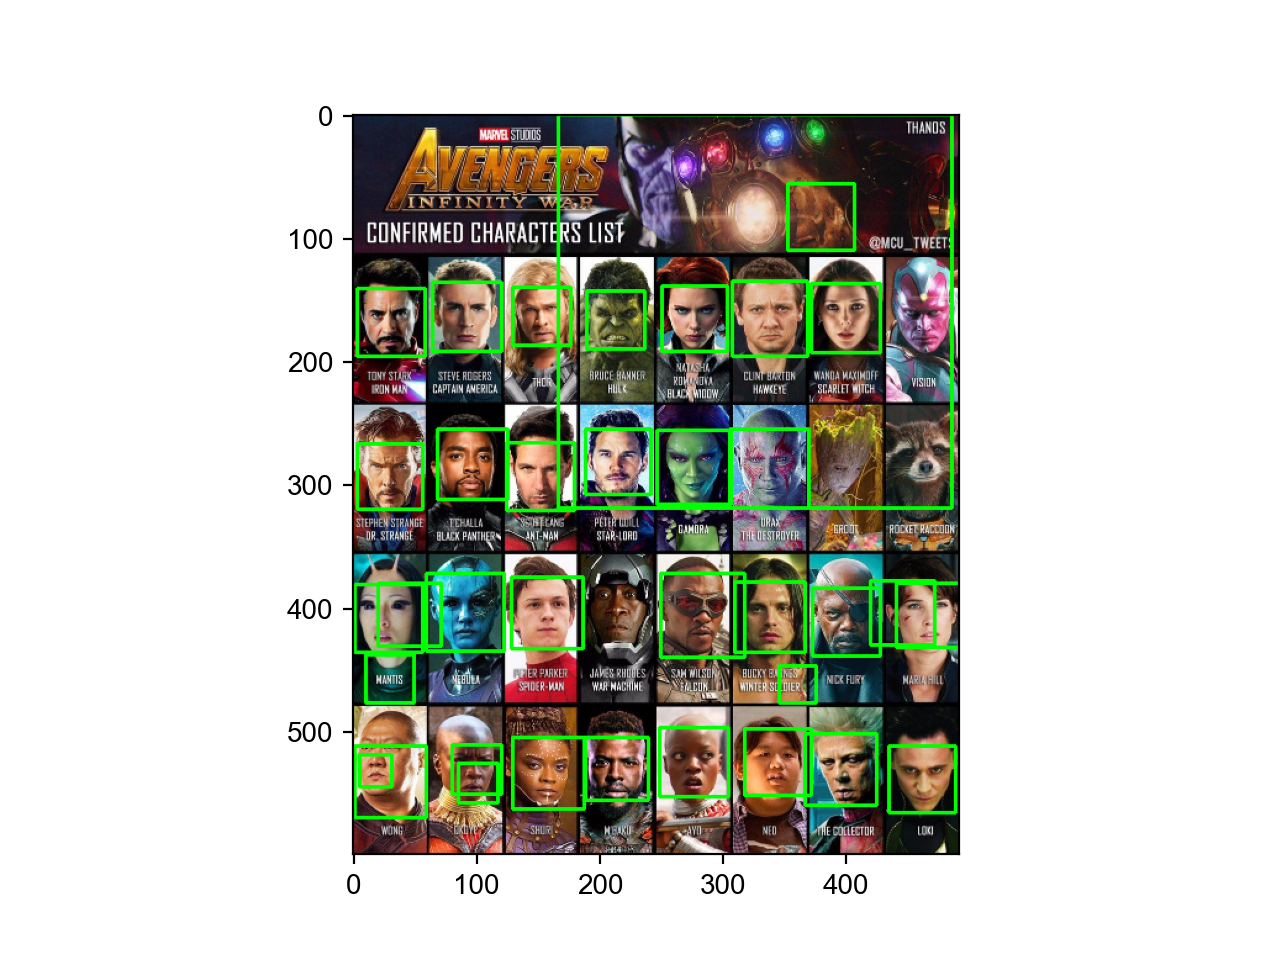

In [10]:
image_faces_drawn_rgb = image_faces_rgb.copy()  # copy onto which we draw the bounding boxes for the faces

# Draw a rectangle around the faces
for (x, y, w, h) in faces:
    # note that this draws on the color image!
    cv2.rectangle(image_faces_drawn_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2) 

print(f"Drawn!!")

LoFi = []  # list of Face images

for (x, y, w, h) in faces:
    # note that this draws on the color image!
    face = image_faces_rgb[y:y+h,x:x+h,:]  #, (x, y), (x+w, y+h), (0, 255, 0), 2)  
    LoFi.append( face )

#
# let's show off how to create multiple images in one figure, too
#
fig, ax = plt.subplots(1,1)  # this means ax will be a 2x2 numpy array of axes!
ax.imshow(image_faces_drawn_rgb)

<IPython.core.display.Javascript object>


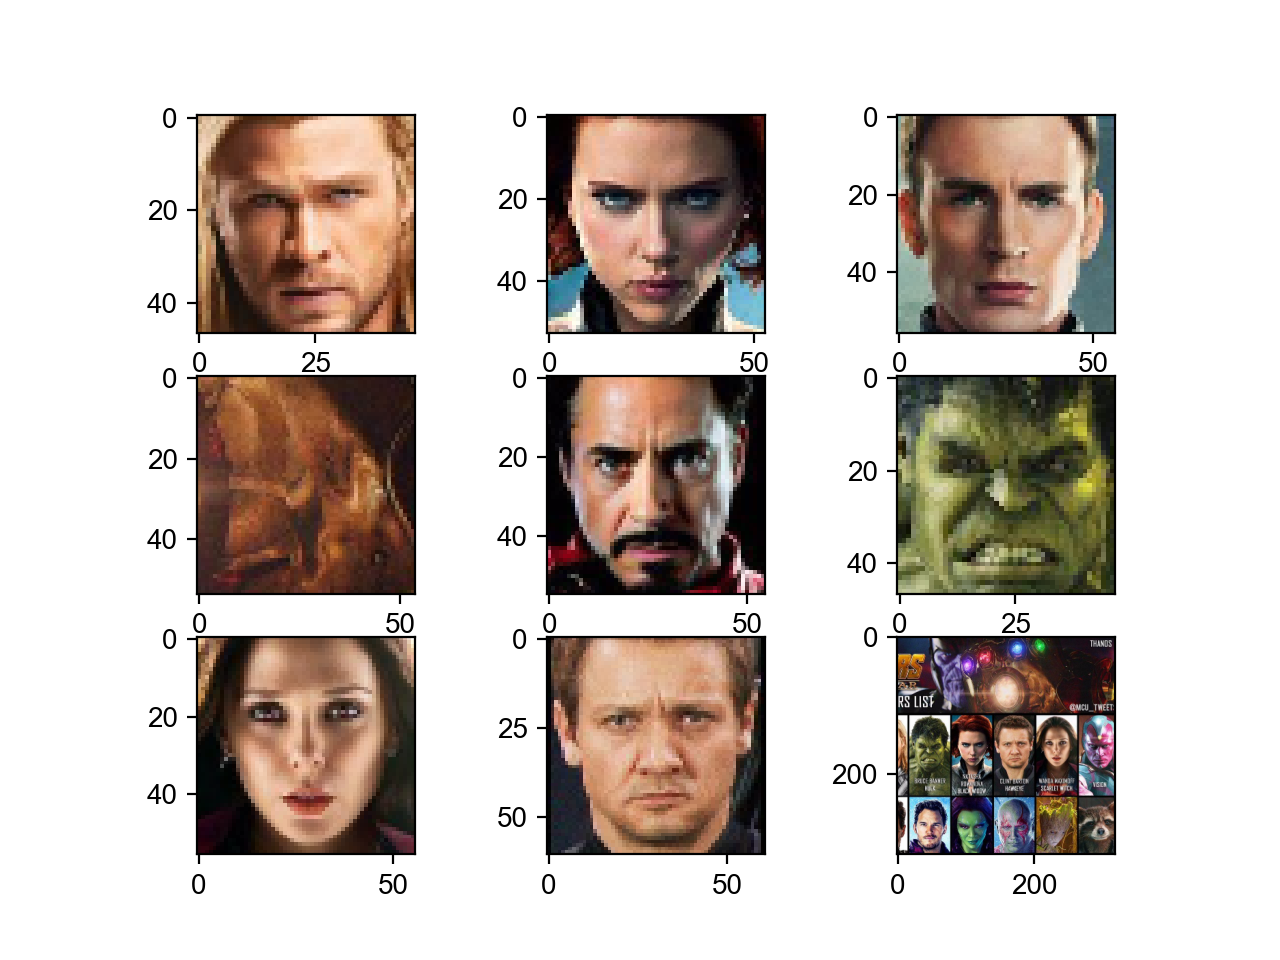

In [11]:
len(LoFi)
fig, ax = plt.subplots(3,3)  # this means ax will be a 2x2 numpy array of axes!
#ax[0,0].imshow(LoFi[0])
#ax[0,0].imshow(cv2.resize(LoFi[0],dsize=(20,20)))
ax[0,0].imshow(LoFi[0])
ax[0,1].imshow(LoFi[1])
ax[0,2].imshow(LoFi[2])
ax[1,0].imshow(LoFi[3])
ax[1,1].imshow(LoFi[4])
ax[1,2].imshow(LoFi[5])
ax[2,0].imshow(LoFi[6])
ax[2,1].imshow(LoFi[7])
ax[2,2].imshow(LoFi[8])

<IPython.core.display.Javascript object>


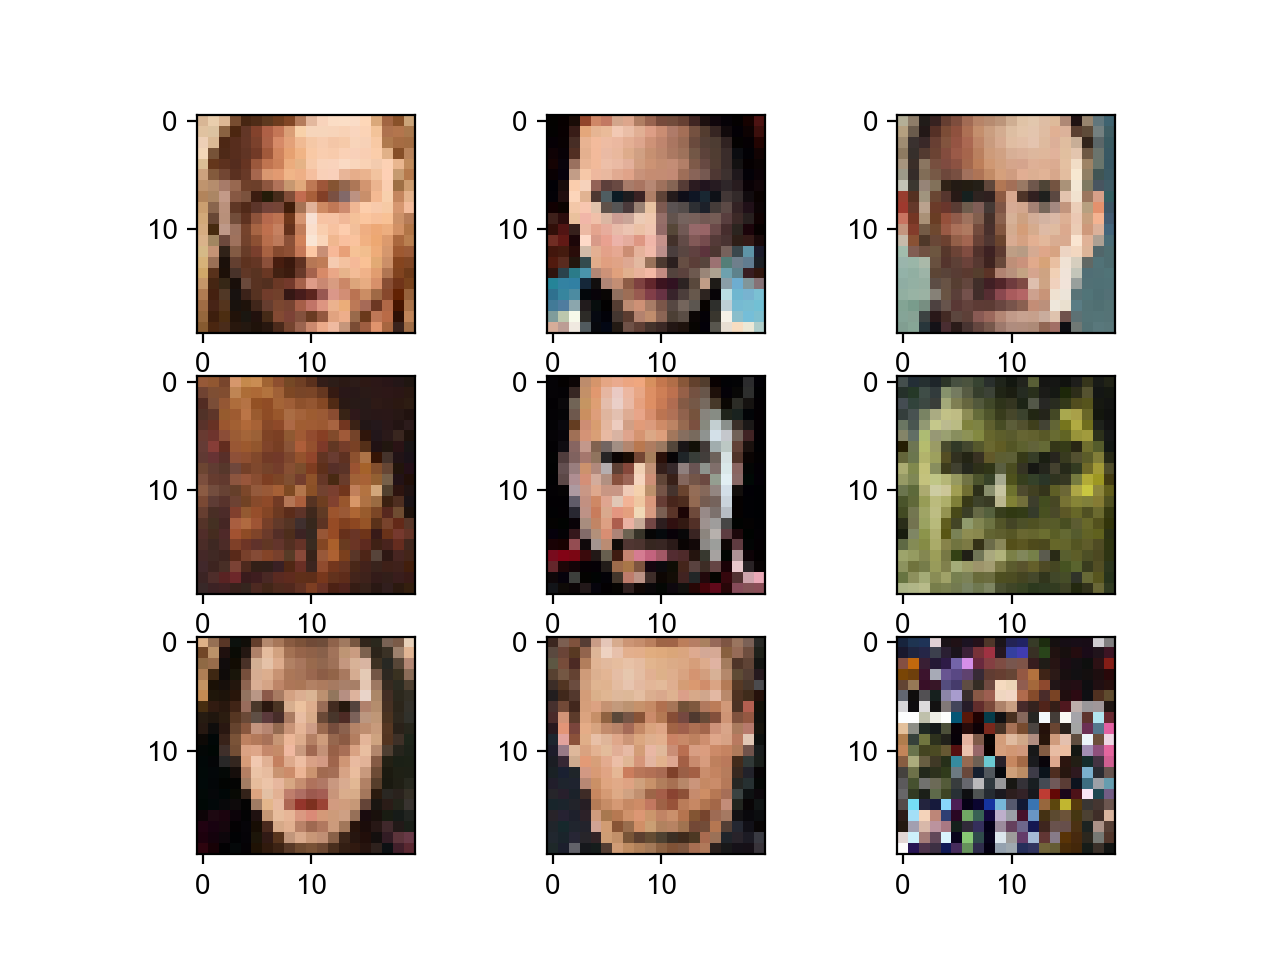

In [12]:
#
# same-resolution for each
# 
LoLoFi = [ cv2.resize(LoFiIm,dsize=(20,20)) for LoFiIm in LoFi ]
fig, ax = plt.subplots(3,3)  # this means ax will be a 2x2 numpy array of axes!
#ax[0,0].imshow(LoFi[0])
#ax[0,0].imshow(cv2.resize(LoFi[0],dsize=(20,20)))
ax[0,0].imshow(LoLoFi[0])
ax[0,1].imshow(LoLoFi[1])
ax[0,2].imshow(LoLoFi[2])
ax[1,0].imshow(LoLoFi[3])
ax[1,1].imshow(LoLoFi[4])
ax[1,2].imshow(LoLoFi[5])
ax[2,0].imshow(LoLoFi[6])
ax[2,1].imshow(LoLoFi[7])
ax[2,2].imshow(LoLoFi[8])

In [13]:
#
# example of template-matching!
#
A = np.zeros( (9,9) )
for r in range(9):
    for c in range(9):
        res = cv2.matchTemplate(LoLoFi[r],LoLoFi[c],cv2.TM_SQDIFF_NORMED)
        # res is a 2d image, so... we extract the value
        A[r,c] = res[0,0]
        
with np.printoptions(precision=3, suppress=True):  # suppress suppresses exponential notation!
    print(f"{A}")

[[0.    0.647 0.138 0.725 0.639 0.709 0.393 0.301 0.664]
 [0.647 0.    0.525 0.579 0.324 0.486 0.468 0.354 0.71 ]
 [0.138 0.525 0.    0.66  0.573 0.568 0.401 0.297 0.573]
 [0.725 0.579 0.66  0.    0.503 0.389 0.512 0.499 0.651]
 [0.639 0.324 0.573 0.503 0.    0.566 0.377 0.287 0.814]
 [0.709 0.486 0.568 0.389 0.566 0.    0.635 0.484 0.576]
 [0.393 0.468 0.401 0.512 0.377 0.635 0.    0.234 0.729]
 [0.301 0.354 0.297 0.499 0.287 0.484 0.234 0.    0.66 ]
 [0.664 0.71  0.573 0.651 0.814 0.576 0.729 0.66  0.   ]]


<IPython.core.display.Javascript object>


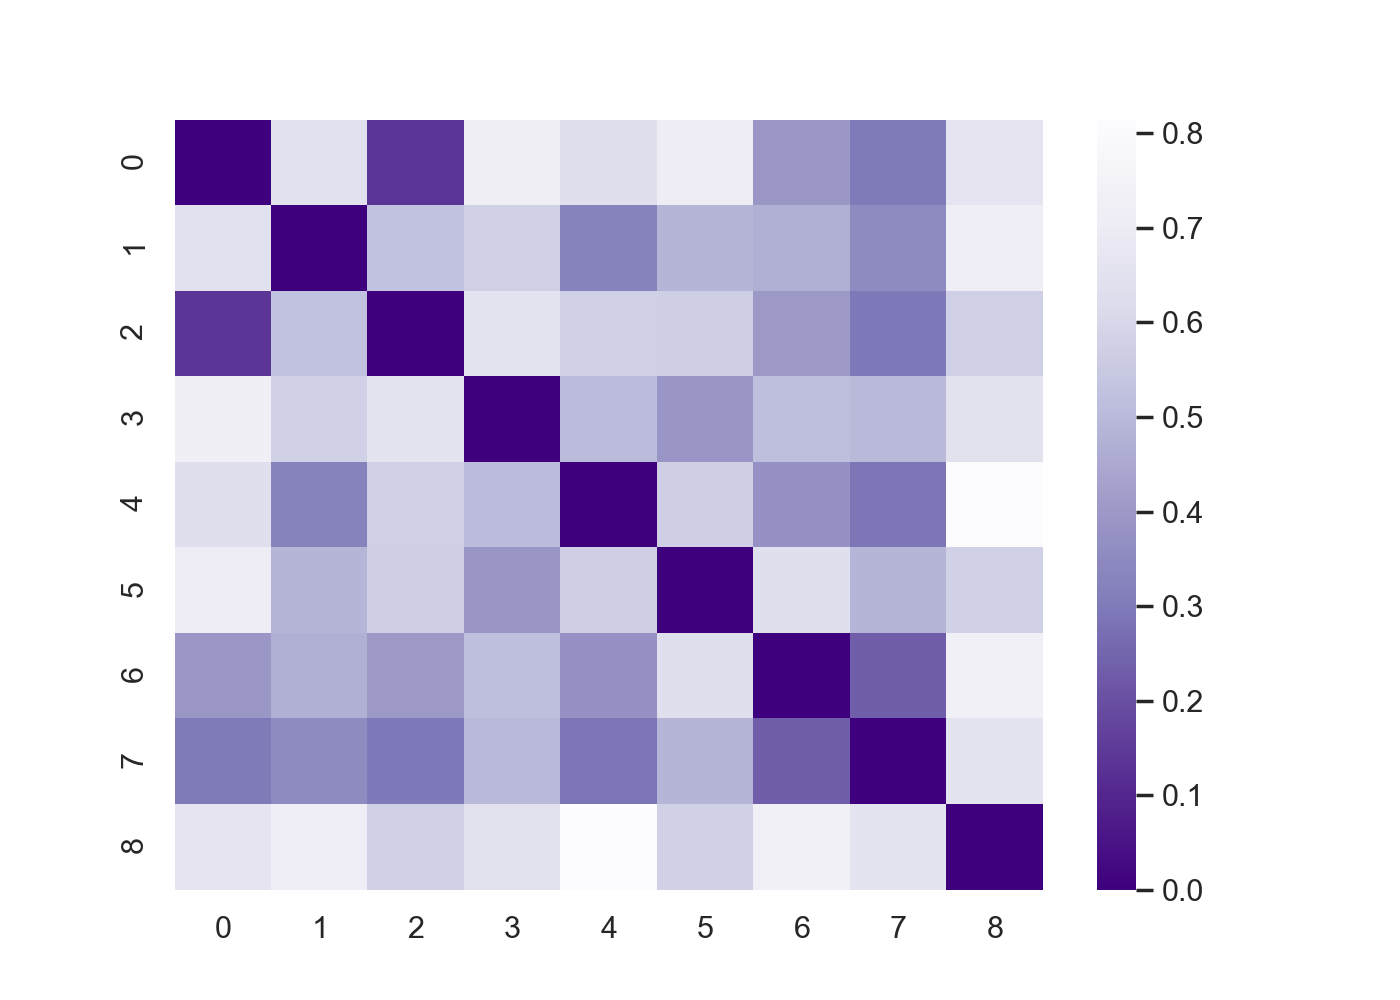

<AxesSubplot:>

In [14]:
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(A, cmap="Purples_r") # Purples_r
#, cmap="Gray", vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<IPython.core.display.Javascript object>


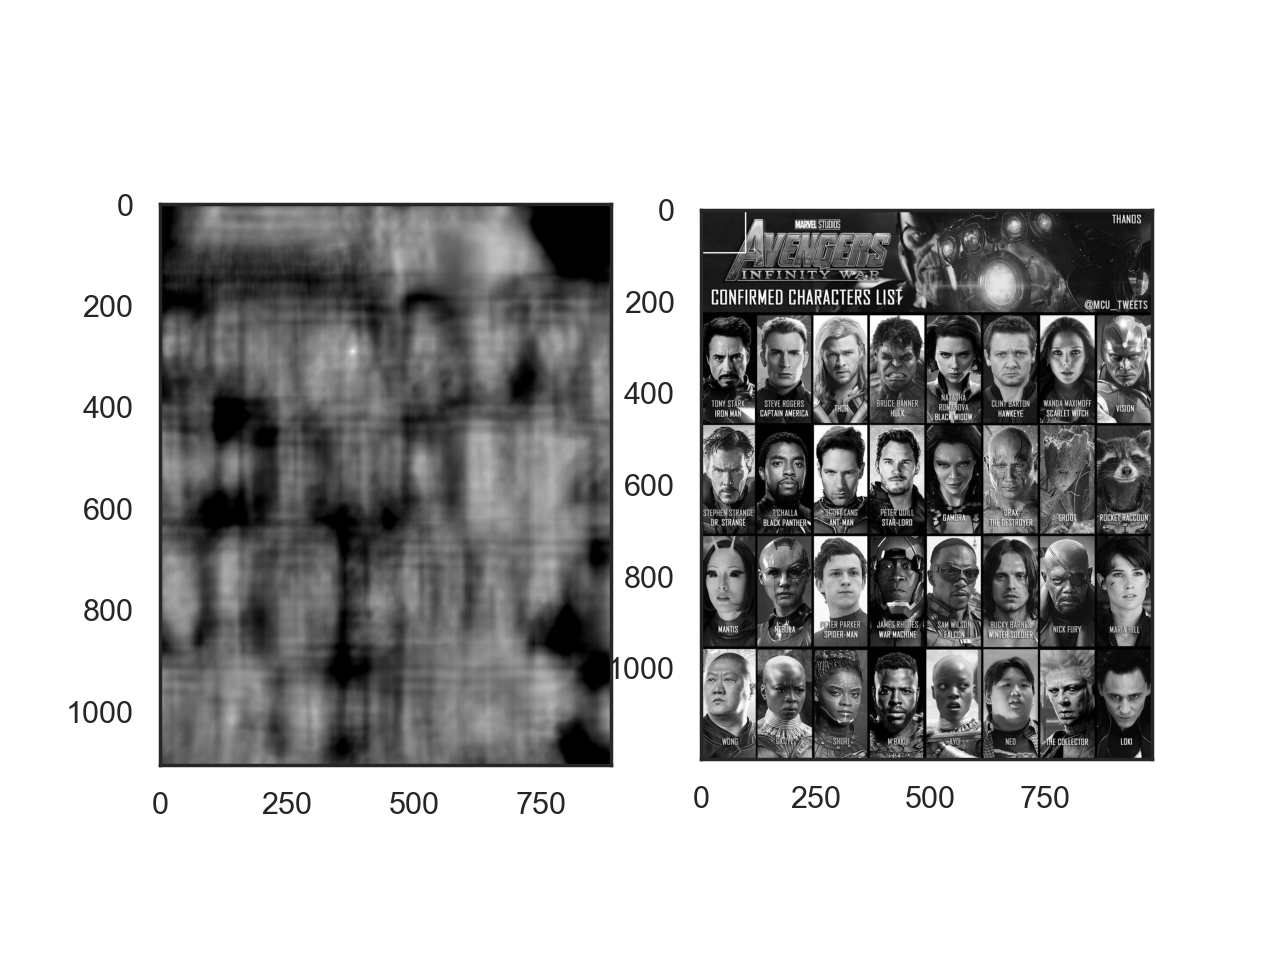

In [15]:
#
# exaple of template-matching
#

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('avengers.jpg',0) # the 0 input means "grayscale"
img2 = img.copy()
template = cv.imread('hulkface.png',0) # the 0 input means "grayscale"

w, h = template.shape[::-1]

# All the 6 methods available
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']


if True:
    meth = 'cv.TM_SQDIFF_NORMED'
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in ['cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']:
        top_left = min_loc
    else:
        top_left = max_loc  # otherwise take 
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    fig, ax = plt.subplots(1,2)  # this means ax will be a 2x2 numpy array of axes!
    ax[0].imshow(1-res,cmap = 'gray')
    ax[1].imshow(img,cmap = 'gray')